1. [analysis error](#analysis-error) 
2. [abs error analysis](#abs-error-analysis)
3. [Feature importances](#Feature-importances)
4. [Shap lib](#Shap-lib)
5. [dependence plot](#dependence-plot)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('uk-used-cars/bmw.csv')
df.keys(), df.columns

(Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
        'mpg', 'engineSize'],
       dtype='object'),
 Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
        'mpg', 'engineSize'],
       dtype='object'))

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
# Обучающая, валидационная и тестовая выборка

from sklearn.model_selection import train_test_split


train, test = train_test_split(df,train_size=0.6,random_state=42)
val, test = train_test_split(test,train_size=0.5,random_state=42)


In [5]:
# список фичей

X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']
     

In [6]:
from catboost import CatBoostRegressor


In [7]:

parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}
     

In [8]:
model = CatBoostRegressor(**parameters)
model.fit(train[X],train[y],eval_set=(val[X],val[y]))


0:	learn: 0.4564416	test: 0.4521294	best: 0.4521294 (0)	total: 55.1ms	remaining: 55s
100:	learn: 0.0875290	test: 0.0867329	best: 0.0867329 (100)	total: 238ms	remaining: 2.12s
200:	learn: 0.0760834	test: 0.0779235	best: 0.0779235 (200)	total: 364ms	remaining: 1.45s
300:	learn: 0.0708670	test: 0.0740290	best: 0.0740290 (300)	total: 488ms	remaining: 1.13s
400:	learn: 0.0676240	test: 0.0718814	best: 0.0718814 (400)	total: 616ms	remaining: 919ms
500:	learn: 0.0654070	test: 0.0709221	best: 0.0708594 (496)	total: 744ms	remaining: 741ms
600:	learn: 0.0638577	test: 0.0704606	best: 0.0704490 (599)	total: 872ms	remaining: 579ms
700:	learn: 0.0622969	test: 0.0698226	best: 0.0698226 (700)	total: 999ms	remaining: 426ms
800:	learn: 0.0609583	test: 0.0694169	best: 0.0694004 (791)	total: 1.13s	remaining: 280ms
900:	learn: 0.0596089	test: 0.0689968	best: 0.0689945 (895)	total: 1.25s	remaining: 138ms
999:	learn: 0.0584626	test: 0.0686829	best: 0.0686377 (993)	total: 1.38s	remaining: 0us

bestTest = 0.068

In [9]:
test['price_pred'] = model.predict(test[X])
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658
...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665


In [10]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


def error(y_true,y_pred):
    print(mean_absolute_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))

In [11]:
error(test['price'],test['price_pred'])


1537.5600657036578
0.0724718966452533


# analysis error

посмотретть и проанализировать ошибки. как завышает или занижает

анализирую на тестовой выборке, потому что модель её не видела

In [12]:
test['error'] = test['price_pred'] - test['price']
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658
...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335


<Axes: >

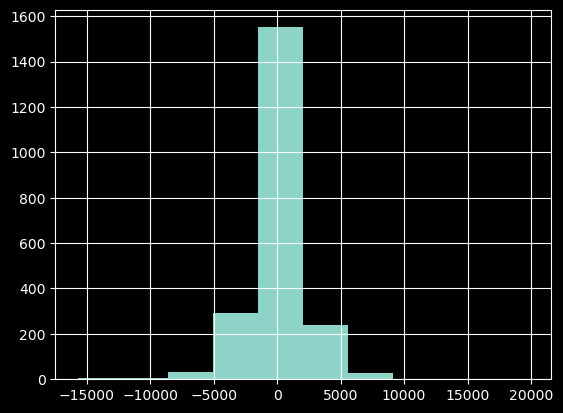

In [13]:
# распределение ошибки
import matplotlib.pyplot as plt
plt.style.use('dark_background')


test['error'].hist() # модель и занижает и завышает примерно по ровну. 

In [14]:
test['error'].mean() # посмотртеть как в среднем ошибка, завышает или занижает

122.08788795070966

# абсолютная ошибка

В основном анализирую абсолютную ошибку(без знака). и анализирую на тестовой выборке

In [15]:
test['error_abs'] = abs(test['error'])

In [16]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658
...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335


<Axes: >

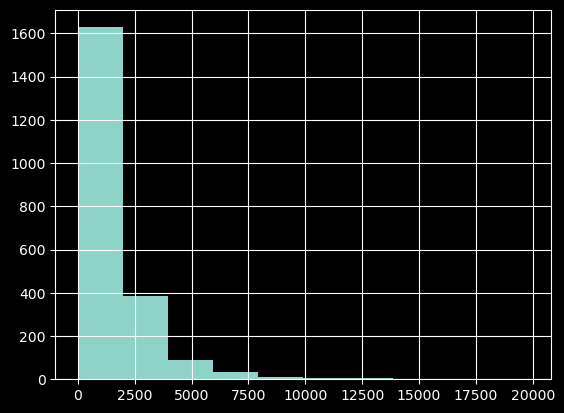

In [17]:
test['error_abs'].hist()

In [18]:
test['error_abs'].describe() # посмотрим процентили ошибок

count     2157.000000
mean      1537.560066
std       1676.859544
min          0.083199
25%        489.152540
50%       1073.305750
75%       1946.619471
max      19820.676673
Name: error_abs, dtype: float64

In [19]:
# топ 10 машин с самой большшой ошибкой. сортирую по error_abs. ascending=False что бы по убыванию
test.sort_values('error_abs', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,-15727.185240,15727.185240
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,-14503.629810,14503.629810
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,14097.283023,14097.283023
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,-12927.850548,12927.850548
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47193.043921,-12805.956079,12805.956079
947,2 Series,2015,11998,Semi-Auto,30738,Diesel,20,68.9,2.0,24663.932331,12665.932331,12665.932331
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30133.732400,-12361.267600,12361.267600
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46802.901943,-11859.098057,11859.098057
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42513.071957,-11485.928043,11485.928043


пока что понять почему такие ошибки - сложно

# abs error analysis

    кажется что модель в основном ошибается на дорогих автомобилях
    группируем по цене и смотрим на среднюю  ошибку(бью цены на интревалы)
    

In [20]:
test['price_group'] = pd.qcut(test['price'], 5)

In [21]:
test.groupby('price_group', observed=True)[['error_abs', 'error']].agg(['count', 'mean'])

error_abs              error            
                        count         mean count        mean
price_group                                                 
(1199.999, 13995.0]       435   911.712080   435  462.229738
(13995.0, 18500.0]        432  1151.556512   432  281.411969
(18500.0, 23131.6]        427  1318.846517   427  254.475675
(23131.6, 29990.0]        432  1749.723698   432  378.241254
(29990.0, 74990.0]        431  2560.143373   431 -768.811293

    как еще можно улучшить именно анализ?
    можно добавить в таблицу выше среднее по всей выборке

In [22]:
t = test.groupby('price_group', observed=True)[['error_abs', 'error']].agg(['count', 'mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values] # убираю мультииндекс
t

,error_abs_count,error_abs_mean,error_count,error_mean
price_group,,,,
"(1199.999, 13995.0]",435,911.712080,435,462.229738
"(13995.0, 18500.0]",432,1151.556512,432,281.411969
"(18500.0, 23131.6]",427,1318.846517,427,254.475675
"(23131.6, 29990.0]",432,1749.723698,432,378.241254
"(29990.0, 74990.0]",431,2560.143373,431,-768.811293


In [23]:
t = t.drop('error_count', axis=1) # удаляю один из одинаковых столбцов
t

,error_abs_count,error_abs_mean,error_mean
price_group,,,
"(1199.999, 13995.0]",435,911.712080,462.229738
"(13995.0, 18500.0]",432,1151.556512,281.411969
"(18500.0, 23131.6]",427,1318.846517,254.475675
"(23131.6, 29990.0]",432,1749.723698,378.241254
"(29990.0, 74990.0]",431,2560.143373,-768.811293


In [24]:
# отклонение от среднего.(занизили или завысили)
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [25]:
# добавляю среднюю ошибку. что бы она была перед  глазами
t['mean_error'] = test['error_abs'].mean()

In [26]:
t


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


In [27]:
# подкрасить значения. чтобы делал ярче те значения (строчки) где разница больше
import seaborn as sns

cm = sns.dark_palette("red", as_cmap=True)

t.style.background_gradient(cmap=cm, subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


# анализи абсолютной ошибки относительно остальных переменных

In [28]:
test


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335,"(13995.0, 18500.0]"


# что бы код постоянно не копировать, оберну все в функцию

    Это помогает увидеть, для каких групп (например, годов выпуска) модель ошибается больше или меньше, что позволяет лучше понять, где модель работает хуже.
    

In [29]:

def print_error(col):
    t = test.groupby(col, observed=True)[['error_abs', 'error']].agg(['count', 'mean'])
    t.columns = ['_'.join(col).strip() for col in t.columns.values] # убираю мультииндекс
    t = t.drop('error_count', axis=1) # удаляю один из одинаковых столбцов
    # отклонение от среднего.(занизили или завысили)
    t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()
    # добавляю среднюю ошибку. что бы она была перед  глазами
    t['mean_error'] = test['error_abs'].mean()
    cm = sns.dark_palette("red", as_cmap=True)
    
    # display что бы выводилось на экран из функции
    display(t.style.background_gradient(cmap=cm, subset=['mean_error_diff']))

    видно что тоже, чем новее автомобиль, тем модель больше ошибается
    и видно, что по каким то причинам модель завышает ошибку на годах от 2019

In [30]:
print_error('year')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


In [31]:
print_error("transmission")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,1494.208611,36.406949,-43.351455,1537.560066
Manual,504,1079.145745,142.507574,-458.414320,1537.560066
Semi-Auto,958,1810.180189,173.504100,272.620124,1537.560066


    !!!смотрим по пробегу. что бы посмотреть по пробегу, надо его отгрупировать. 
    так как это тоже непрерывная   переменнаая
    
    Зачем это надо: Группировка помогает упростить анализ непрерывных переменных, чтобы лучше увидеть закономерности и ошибки модели для разных диапазонов значений.

    Непрерывная переменная: Это переменная, которая может принимать бесконечное количество значений в пределах определённого диапазона (например, пробег или цена).

    Другие переменные:  есть дискретные переменные (категории, как "тип топлива"), порядковые переменные (например, ранжирование) и бинарные (да/нет).

    Если не группировать: Будет сложнее выявить закономерности, особенно если значения сильно варьируются.

    Когда группировать: Если переменная непрерывная и слишком разнообразна для прямого анализа, группировка помогает выявить тенденции.

    Как понять: Непрерывная переменная может принимать любые значения в пределах диапазона, например, дробные числа (как пробег или цена).








In [32]:
test['mileage_group'] = pd.qcut(test['mileage'], 5)


In [33]:
print_error("mileage_group") # видно что машина больше ошибается на тех у которых маленький пробег(типа новые)

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,2433.845556,293.238143,896.285490,1537.560066
"(4063.2, 9825.4]",431,1725.080432,67.411269,187.520367,1537.560066
"(9825.4, 24299.0]",432,1395.285364,65.804632,-142.274702,1537.560066
"(24299.0, 43519.8]",430,1141.553935,13.742028,-396.006130,1537.560066
"(43519.8, 190000.0]",432,990.635754,169.615201,-546.924311,1537.560066


In [34]:
print_error("fuelType")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,1394,1437.061117,98.276014,-100.498949,1537.560066
Hybrid,64,1558.853198,-352.158801,21.293132,1537.560066
Other,5,944.136410,-941.902308,-593.423655,1537.560066
Petrol,694,1741.738585,221.317702,204.178520,1537.560066


In [35]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911,"(13995.0, 18500.0]","(43519.8, 190000.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549,"(23131.6, 29990.0]","(4063.2, 9825.4]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904,"(29990.0, 74990.0]","(0.999, 4063.2]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335,"(13995.0, 18500.0]","(43519.8, 190000.0]"


In [36]:
# duplicates='drop' потому что там много повторяющихся значений
test['tax_group'] = pd.qcut(test['tax'],5, duplicates='drop')

In [37]:
print_error("tax_group")

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,823.722414,91.176598,-713.837651,1537.560066
"(125.0, 145.0]",1131,1807.424736,117.301327,269.864670,1537.560066
"(145.0, 150.0]",252,1707.575874,118.514950,170.015808,1537.560066
"(150.0, 580.0]",262,1604.063700,206.593848,66.503634,1537.560066


In [38]:
test.groupby('tax_group')[['price', 'year']].agg(['count', 'mean'])

/tmp/ipykernel_14779/2369793304.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test.groupby('tax_group')[['price', 'year']].agg(['count', 'mean'])


price                year             
                count          mean count         mean
tax_group                                             
(-0.001, 125.0]   512  13264.859375   512  2015.365234
(125.0, 145.0]   1131  27536.747126  1131  2018.382847
(145.0, 150.0]    252  25288.376984   252  2018.166667
(150.0, 580.0]    262  18207.576336   262  2014.118321

In [39]:
test['mpg_group'] = pd.qcut(test['mpg'], 5)

In [40]:
print_error('mpg_group') # чем меньше mpg тем модель ошибается силнее

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,2159.412978,227.429403,621.852912,1537.560066
"(42.2, 50.4]",487,1664.200649,361.406267,126.640583,1537.560066
"(50.4, 55.4]",380,1517.852124,46.756860,-19.707942,1537.560066
"(55.4, 64.2]",449,1238.191642,-105.163252,-299.368424,1537.560066
"(64.2, 470.8]",397,1044.181685,39.825594,-493.378380,1537.560066


In [41]:
# видно что там где расход больше там и новые и дорогие машины
test.groupby('mpg_group')[['price', 'year']].agg(['count', 'mean'])

/tmp/ipykernel_14779/2633485973.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test.groupby('mpg_group')[['price', 'year']].agg(['count', 'mean'])


price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 42.2]   444  32876.211712   444  2017.743243
(42.2, 50.4]    487  23569.260780   487  2017.451745
(50.4, 55.4]    380  21489.018421   380  2017.194737
(55.4, 64.2]    449  18276.222717   449  2016.443207
(64.2, 470.8]   397  16704.297229   397  2016.727960

<Axes: xlabel='year'>

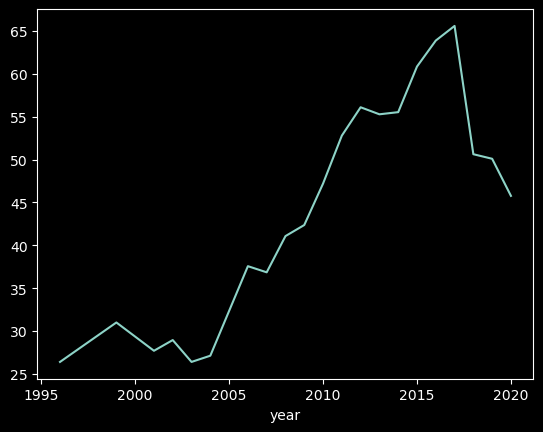

In [42]:
test.groupby('year')['mpg'].mean().plot()

In [43]:
test['engineSize'].value_counts()

engineSize
2.0    1323
3.0     495
1.5     278
1.6      24
4.4      15
0.0       7
2.5       4
2.2       3
2.8       2
3.2       2
4.0       2
0.6       1
6.6       1
Name: count, dtype: int64

In [44]:
# группирую по объему двигателя. правая граница включается
test['engine_group'] = pd.cut(test['engineSize'], [0, 1.5, 2, float('inf')])

In [45]:
print_error("engine_group") # чем больше объем двиигателя, тем больше ошибка

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engine_group,,,,,
"(0.0, 1.5]",279,1135.531674,149.248281,-402.028392,1537.560066
"(1.5, 2.0]",1347,1423.236324,60.610112,-114.323742,1537.560066
"(2.0, inf]",524,2049.868683,265.297889,512.308617,1537.560066


<Axes: xlabel='year'>

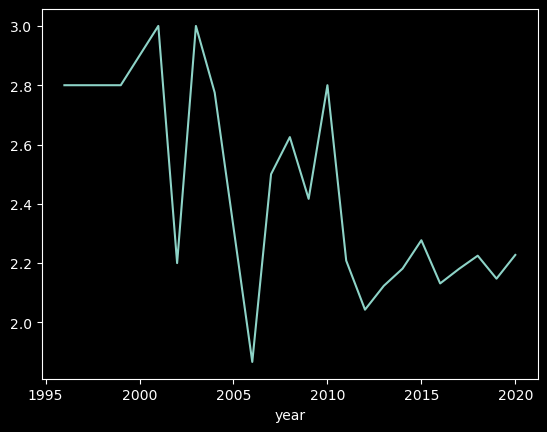

In [46]:
test.groupby('year')['engineSize'].mean().plot()

# Feature importances

In [47]:
# беру модель и вызываю .get_feature_importance(prettified=True)
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,year,21.663393
1,engineSize,19.886510
2,mileage,17.956035
3,model,16.587238
4,mpg,14.284600
5,fuelType,4.843232
6,transmission,3.381356
7,tax,1.397635


# Shap lib

    библиотека, которая позволяет считать вклад каждой фичи в предсказании

In [48]:
# !pip install shap

In [49]:
# нужно так испортировать для каждой ячейке ессли работаю в колаб 
import shap
shap.initjs()



In [50]:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [51]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(test[X])

In [52]:
# в таблице будет видно какой вклад дала конкретно каждая фича в финальный предикт
pd.DataFrame(shap_values.values, columns=X)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208
...,...,...,...,...,...,...,...,...
2152,-1224.126471,-3428.321075,115.041872,-5570.789418,347.522997,-7.006045,-930.727806,2123.672872
2153,-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2154,1331.256544,3296.088696,254.481261,3740.499059,454.362542,263.610745,-1327.864100,-998.356812
2155,-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


In [53]:
train['price'].mean()

22768.483920841063

In [54]:
shap_values

.values =
array([[ 8311.4850192 ,  3980.87656957,  1463.00573686, ...,
          196.71656162,  7303.93176972,  4667.78434525],
       [ -562.03741649,   301.74383455,   951.97942598, ...,
           64.16118672, -1051.2256274 ,  -731.72082808],
       [-2557.85929134, -1952.00414331,   228.39731651, ...,
         -209.53042485,  1371.35571085, -1007.7715943 ],
       ...,
       [ 1331.25654416,  3296.08869578,   254.48126078, ...,
          263.61074481, -1327.86410005,  -998.35681221],
       [-1168.52929755, -2089.34588653,   191.54983151, ...,
         -370.59592538, -1726.06178252,  -697.55090663],
       [-3834.87409984,  2975.95964594,   662.31737074, ...,
          166.9116802 ,  -693.40993096,  -950.18438034]])

.base_values =
array([22768.35016168, 22768.35016168, 22768.35016168, ...,
       22768.35016168, 22768.35016168, 22768.35016168])

.data =
array([[' X6', 2019, 'Semi-Auto', ..., 145, 34.9, 3.0],
       [' X1', 2018, 'Semi-Auto', ..., 150, 60.1, 2.0],
       [' 1 Seri

In [55]:
# visualize the first prediction's explanation
shap.plots.force(shap_values[0, ...])

# топ 10 ошибок модели

    посмотреть топ ошибок, что бы попытаться разобраться почему ошибки
    сделаю таблицу где будут и фичи и shap values

In [56]:
shap_cols = [x + '_shap' for x in X]
shap_cols

['model_shap',
 'year_shap',
 'transmission_shap',
 'mileage_shap',
 'fuelType_shap',
 'tax_shap',
 'mpg_shap',
 'engineSize_shap']

In [57]:
shap_values_df = pd.DataFrame(shap_values.values, columns=shap_cols)

In [58]:
# что бы склеить их по вертикали делаю axis=1
pd.concat([test, shap_values_df], axis=1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
4984,X6,2019.0,52990.0,Semi-Auto,3086.0,Diesel,145.0,34.9,3.0,56789.268481,...,"(5.499, 42.2]","(2.0, inf]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4880,X1,2018.0,24081.0,Semi-Auto,13245.0,Diesel,150.0,60.1,2.0,22236.888207,...,"(55.4, 64.2]","(1.5, 2.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9132,1 Series,2016.0,12999.0,Automatic,68949.0,Petrol,200.0,43.5,2.0,13529.705791,...,"(42.2, 50.4]","(1.5, 2.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6451,1 Series,2020.0,11995.0,Semi-Auto,10.0,Petrol,150.0,34.5,2.0,31815.676673,...,"(5.499, 42.2]","(1.5, 2.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7199,3 Series,2020.0,29875.0,Semi-Auto,150.0,Petrol,145.0,42.2,2.0,35549.276658,...,"(5.499, 42.2]","(1.5, 2.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.154439,3527.292958,774.733322,1387.939115,-1143.643683,182.993136,-899.014932,-872.283651
2151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1677.122885,-626.704945,1083.332516,-903.984735,252.037148,357.752686,-1907.530710,-879.736832
2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


    появились пропуски, потому что там разные индексы. Иногда это может пригодиться
    но не сейчас.
    так получилось, когда создавили shap_values_df там индексы идут от 0 до ... количества строк

In [59]:
# что бы это избежать. делаю reset_index() у теста
test_shap = pd.concat([test.reset_index(), shap_values_df], axis=1)
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,...,"(5.499, 42.2]","(2.0, inf]",8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,...,"(50.4, 55.4]","(2.0, inf]",-1224.126471,-3428.321075,115.041872,-5570.789418,347.522997,-7.006045,-930.727806,2123.672872
2153,6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,...,"(5.499, 42.2]","(2.0, inf]",-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2154,1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",1331.256544,3296.088696,254.481261,3740.499059,454.362542,263.610745,-1327.864100,-998.356812
2155,4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,...,"(64.2, 470.8]","(1.5, 2.0]",-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


In [60]:
pd.options.display.max_columns=100

In [61]:
test_shap = test_shap.sort_values('error_abs', ascending=False) # отсортировал по абсолютной ошибке
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]",-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,-15727.185240,15727.185240,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",-104.479186,5182.943839,677.382931,4770.282152,386.823223,181.037349,-1100.984160,-938.541551
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,-14503.629810,14503.629810,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(64.2, 470.8]","(1.5, 2.0]",-164.479811,4387.541547,614.274945,4198.937818,-57.662328,181.648133,-2841.705569,-1070.534707
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,14097.283023,14097.283023,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",13054.103088,4340.189600,2185.334863,9822.539987,661.055741,145.413544,22742.361574,9372.934464
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,-12927.850548,12927.850548,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",3716.360225,2802.188759,927.076271,5460.684012,164.840088,-147.249380,-1339.477898,-2300.622786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,9630,X1,2017,14226,Manual,41950,Diesel,20,68.9,2.0,14224.721356,-1.278644,1.278644,"(13995.0, 18500.0]","(24299.0, 43519.8]","(-0.001, 125.0]","(64.2, 470.8]","(1.5, 2.0]",-368.809564,-201.713537,-2392.563547,-2667.325316,-115.354445,-280.850026,-1978.662794,-538.349577
724,8122,4 Series,2017,20000,Automatic,14282,Petrol,145,48.7,2.0,19998.821371,-1.178629,1.178629,"(18500.0, 23131.6]","(9825.4, 24299.0]","(125.0, 145.0]","(42.2, 50.4]","(1.5, 2.0]",100.498923,-1038.006507,201.178311,52.262838,-892.858465,279.318838,-771.782615,-700.140113
1797,4860,1 Series,2017,13500,Manual,34500,Diesel,150,65.7,2.0,13499.199932,-0.800068,0.800068,"(1199.999, 13995.0]","(24299.0, 43519.8]","(145.0, 150.0]","(64.2, 470.8]","(1.5, 2.0]",-2842.993660,-197.772588,-2316.449417,-2058.535444,141.577611,169.216690,-1655.255186,-508.938235
431,8183,3 Series,2012,10240,Automatic,37089,Petrol,160,47.1,2.0,10240.437787,0.437787,0.437787,"(1199.999, 13995.0]","(24299.0, 43519.8]","(150.0, 580.0]","(42.2, 50.4]","(1.5, 2.0]",-1081.843133,-7435.547213,91.974973,-2118.066937,-742.526118,-204.358477,-152.774073,-884.771396


In [62]:
# visualize the first prediction's explanation
shap.plots.force(
    explainer.expected_value,  # Ожидаемое значение модели
    test_shap[shap_cols].values[0, :],  # SHAP значения для первой строки
    test_shap[X].iloc[0, :]  # Признаки первой строки
)


In [63]:
# пытаемся понятть почему именно в бмв 1 самая большая ошибка. потому что в серия 1 обычно делала с маленькой ошибкой
print_error('model')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
model,,,,,
1 Series,381,1194.311617,55.623839,-343.248449,1537.560066
2 Series,237,1389.965171,192.186465,-147.594895,1537.560066
3 Series,499,1355.692418,63.756704,-181.867648,1537.560066
4 Series,203,1686.099936,-49.587893,148.539871,1537.560066
5 Series,216,1587.859992,188.397477,50.299926,1537.560066
6 Series,17,1864.737066,740.014597,327.177000,1537.560066
7 Series,19,3034.690317,-1632.958667,1497.130251,1537.560066
8 Series,4,3053.702352,-2506.798194,1516.142287,1537.560066
M2,10,2853.991753,2730.294541,1316.431687,1537.560066


In [64]:
# скорее всего какой то косяк с заполнением того текстового поля
train[train['model'] == '1 Series']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [65]:
# видно что все начинается с пробела
train['model'].values

array([' X6', ' X2', ' X2', ..., ' X2', ' X1', ' 1 Series'], dtype=object)

<Axes: >

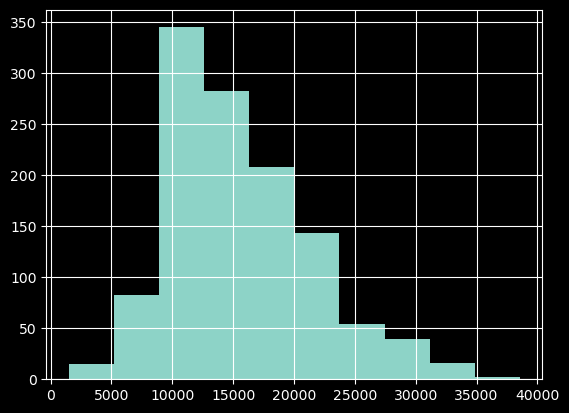

In [66]:
# добавляю пробел
train[train['model'] == ' 1 Series']['price'].hist()

<Axes: >

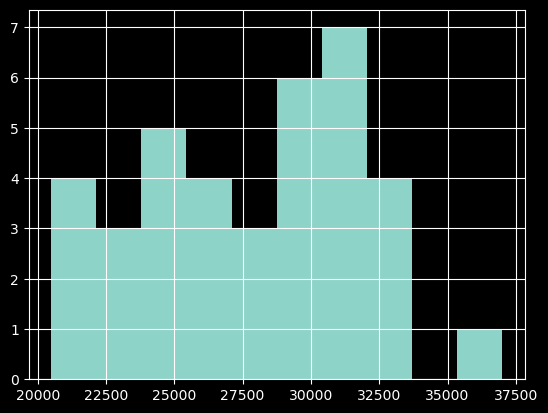

In [67]:
# сейчас посмотрим какая цена норм для 20 года
# и там видно, что ниже 20 тысяч нету машин
train[(train['model'] == ' 1 Series') & (train['year'] == 2020)]['price'].hist()

<Axes: >

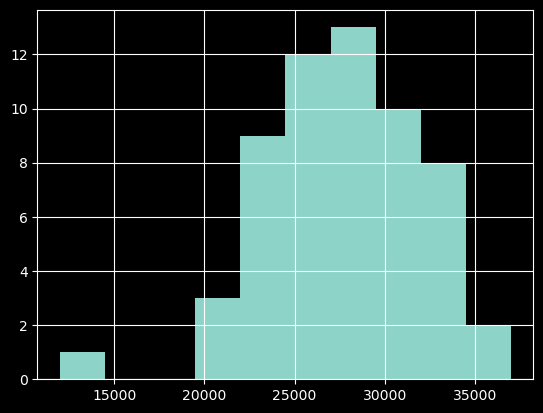

In [68]:
# во всей выборке видно это тачку. она там одна. это какой то выброс
# может тачка с проблемами
# здесь может влиять какой то параметр, которого у нас просто нет
df[(df['model'] == ' 1 Series') & (df['year'] == 2020)]['price'].hist()

# визуализировать сразу несколько наблюдений

In [70]:
shap.plots.force(
    explainer.expected_value,  # Ожидаемое значение модели
    test_shap[shap_cols].values[0, :],  # SHAP значения для первой строки
    test_shap[X].iloc[0, :]  # Признаки первой строки
)

In [75]:
shap.plots.force(
    explainer.expected_value,  # Ожидаемое значение модели
    test_shap[shap_cols].head(10).values,  # SHAP значения для 10 первых строк
    test_shap[X].head(10)  # Признаки первых 10 строк
)

    тут можно как то смотреть и пытатьсяя понять. но в этой ситуации это не очень удобно

In [76]:
shap.plots.force(
    explainer.expected_value,  # Ожидаемое значение модели
    test_shap[shap_cols].values,  # SHAP значения для всех строк
    test_shap[X]  # Признаки первых всех
)

# dependence plot

In [79]:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

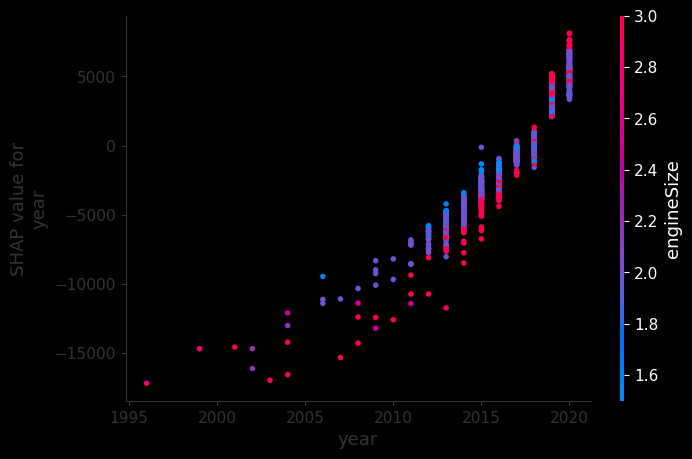

In [84]:
# передаю переменную, значения шап(нумпай аррай), данные
shap.dependence_plot("year", shap_values.values, test[X])

    например для year видно. что чем больше год, тем больше прибавляется за эту фичу(тем дороже машина)
    так же там автоматом выбирается еще какаято переменная. в данном случае engineSize
    
    в общем dependens plot нужен для объяснения каждой переменной, что бы их изучить

In [86]:
type(shap_values.values)

numpy.ndarray

In [87]:
test[X]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4984,X6,2019,Semi-Auto,3086,Diesel,145,34.9,3.0
4880,X1,2018,Semi-Auto,13245,Diesel,150,60.1,2.0
9132,1 Series,2016,Automatic,68949,Petrol,200,43.5,2.0
6451,1 Series,2020,Semi-Auto,10,Petrol,150,34.5,2.0
7199,3 Series,2020,Semi-Auto,150,Petrol,145,42.2,2.0
...,...,...,...,...,...,...,...,...
9627,3 Series,2015,Automatic,78680,Diesel,160,52.3,3.0
6096,4 Series,2019,Automatic,7365,Petrol,145,41.5,3.0
1747,5 Series,2019,Automatic,3067,Hybrid,145,49.6,2.0
4023,3 Series,2016,Automatic,70054,Hybrid,0,148.7,2.0


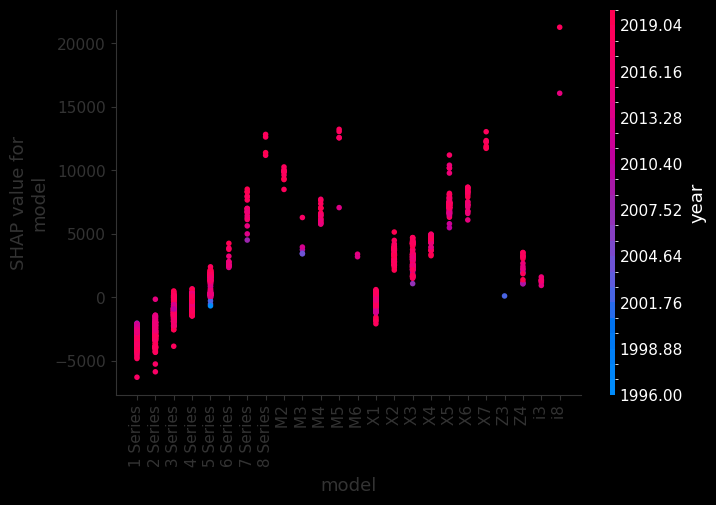

In [90]:
shap.dependence_plot("model", shap_values.values, test[X])

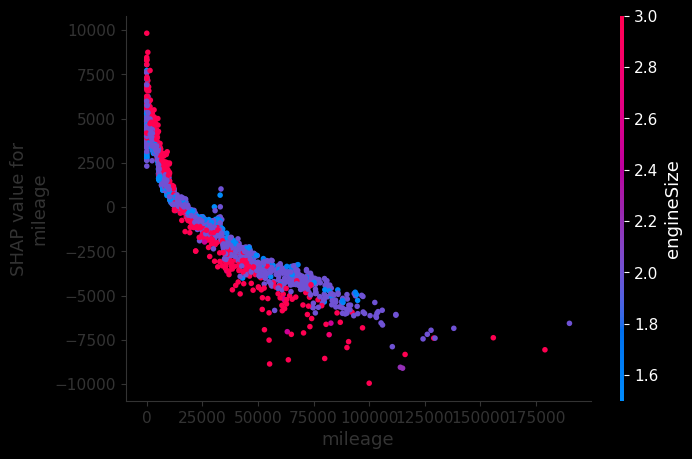

In [95]:
# чем больше пробег. тем меньше модель прибавляет
shap.dependence_plot("mileage", shap_values.values, test[X])

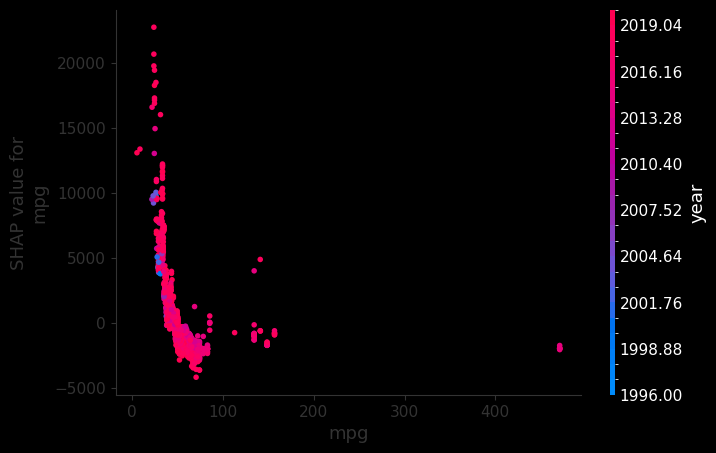

In [96]:
shap.dependence_plot("mpg", shap_values.values, test[X])

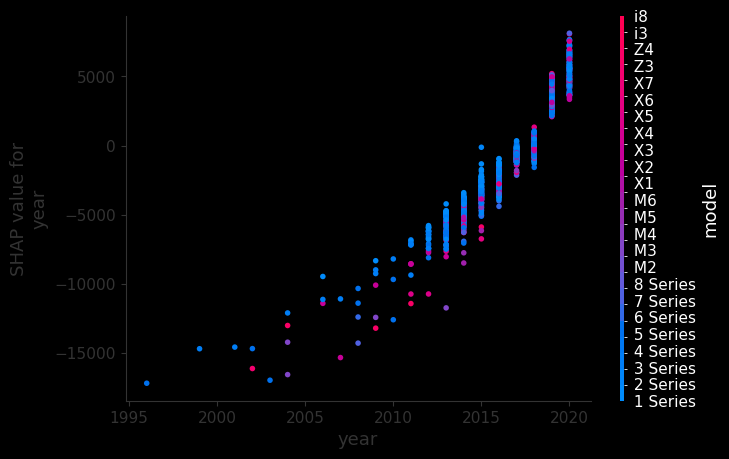

In [98]:
shap.dependence_plot("year", shap_values.values, test[X], interaction_index='model')

# summary plot

    серым - категориаяльные фичи. по ним нельзя построить
    справа есть графа feature values и там видно что краснее больше синее  меньше
    и остальные показывают какое влияние они оказывают на вывод модели.
    например год, если год ниже то дает минус(стоимость занижают) а высокие (завышаеют)
    также пробег там видно, что чем ниже тем цена выше.

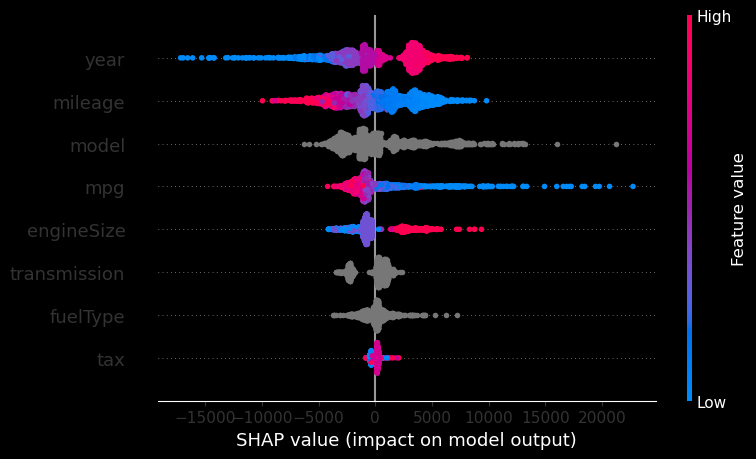

In [100]:
# короче сначала смотреть на самари плот, а потом уже на депенденс
shap.summary_plot(shap_values.values, test[X])